<a href="https://colab.research.google.com/github/vincentattafynn/Data-Science-Journey/blob/main/Visual-Data-Analysis/Visual_Data_Analysis_in_Python_Pt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'svg'

In [3]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [4]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

We are using the Telecom dataset again

In [5]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

#Univariate visualizations

This type of analysis focuses on one feature at a time. When we analyze a feature independently, we are mostly inrerested in teh distribution of its values and ignore other features in the dataset.

We will consider different statistical types of features and the corresponding tools for their individual visual analysis.

#Quantitative features.

Quantitative features take on ordered numerical values. Those values can be discrete or continuous and usually express a count or measurement.


## Histogrmas and Density plots

The easiest way to take a look at the distribution of a numerial variable is to plot its histogram using the DataFram's method hist()



array([[<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>]], dtype=object)

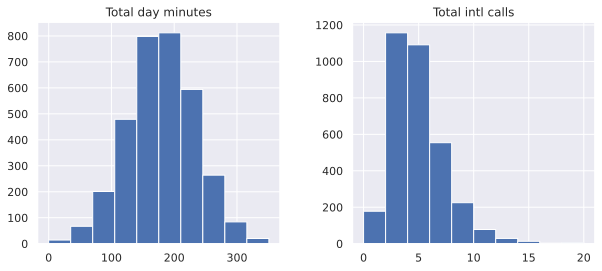

In [6]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10,4))

The shape for the histogram contains clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes essential when you use the Machine Learning methods that assume a particular type.

We can see that Total intl calls is skewed to the right while Total day calls is normally skewed.

There is also another, oftern clearer way to grasp the distribution: density plots or, more formally , Kernel density plots. There a a smoothed version of the histogram, They dont depend on the size of bins, their main advantage.



array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

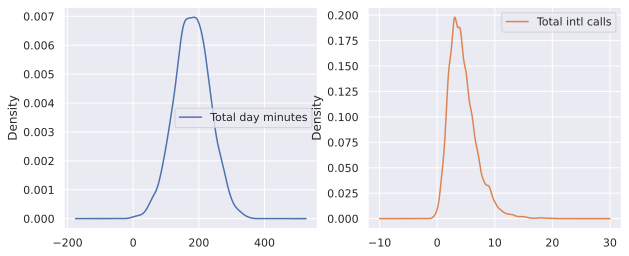

In [7]:
df[features].plot(kind="density",subplots=True, layout=(1,2), sharex=False, figsize=(10,4))

We can also create a histogram with seaborn's function histplot and add the kernel density estimate on top of it

<Axes: xlabel='Total intl calls', ylabel='Density'>

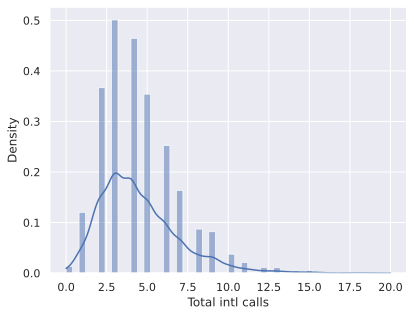

In [8]:
sns.histplot(df["Total intl calls"], kde=True, stat="density")

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

Another useful type of plot is the box plot

<Axes: xlabel='Total intl calls'>

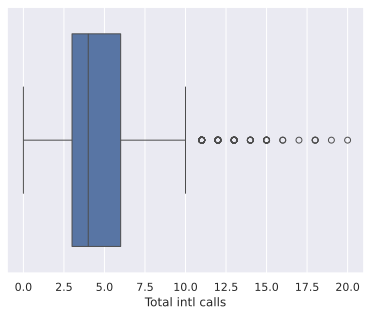

In [9]:
sns.boxplot(x="Total intl calls", data=df)

The components of a box plot are the box, whiskers and the number of individual points(outliers).

The box shows the interquartile spread of the distributions; its length determined by the 25th(Q1) and 75th(Q3) percentiles. The vertical line in the box marks the median of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval(Q1-1.5.IQR, Q3 + 1.5.IQR), where IQR = Q3 - Q1(the interquartile range)

Outlieers that fall outside the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of intl call is rare in out data.


##Violin Plot

The violin plot doesnt differ or tell us any new information that th ebox plot doesnt already do. The violin plot just illustrates a more smoothed diagram of the distribution.

<Axes: ylabel='Total intl calls'>

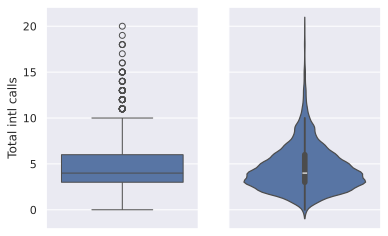

In [10]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1])

To get the exact numerical statistics of the distribution, we can use the describe method

In [11]:
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

#Categorical and binary features
Categorical features take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative propety of this example. Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. Uf the values of a categorical variable are ordered, it is called ordinal.

##Frequency table
Lets's check the class balance in our dataset by looking at the distribution of the target variable: the churn rate. We will first get a frequency table, which shows how frequent ieach value of th categorical variable is. For this, we will use the value_counts() method

In [12]:
df["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

By default entries are sorted from the most to least frequent occuring values.

In this case, the data isnt balanced. That is loyal and disloyal customers aren't equally represented in the dataset. Only a small number of clients canceled their subscriptions.

<Axes: xlabel='Customer service calls', ylabel='count'>

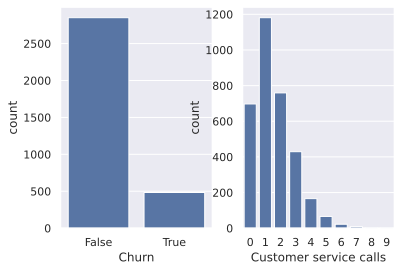

In [13]:
_, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(6,4))
sns.countplot(data=df, ax=axes[0],x="Churn")
sns.countplot(data=df,x="Customer service calls", ax=axes[1])

Histograms are usually used for looking at numerical variables and bar plots for looking at categorical features.

The histogram's x-axis is a cartesian axis along which values can't be changed; the ordering of the bars is not predefined. The bars are often sorted by height, ie the frequency of the values. Ordinal variables are usually ordered by the variable value


We can see from the graphs that majority of customers solve their problems in a maximum 2-3 calls. To predict the minority calss, we may be interested in how the fewer dissatisfied customers behave. It is possible that the tail of the bar plot contains most of the churn but we have to do a bit more analysis to know for sure.

#Multivariabe visualisation

These type of plots allow us to see the relationships between 2 or more different variables and just like univariate plots, the type of variables will determine the type of plots to be used.

##Quantitative vs Qualitative

###Correlation matrix
First we look at the correlation among the numerical variables in the dataset. This is important infor to know because some Machine Learning algos(linear and logistic regression) dont handle highly correlated input variables well.

We use the corr() method first that calculates the correlation between each pair of features. Then we pass the correlation matrix into the heatmap() method from seaborn which renders a color coded matrix for the provided values.

We perform the operation set(df.columns) - set([...]) cause we can to have a set that doesnt contain any categorical variables in them since we cant use them to find the correlation cause they dont have any numerical values.




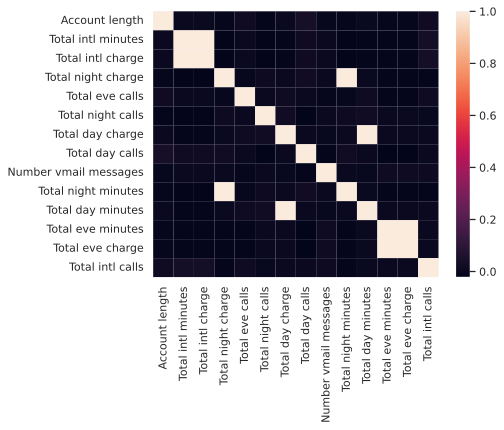

In [14]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

We can see from the correlation matrix that 4 variables are dependent variables(eg total day charge depends on total day minutes). We delete them below


In [15]:
numerical = list(
    set(numerical) -
    set([
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge"
    ])
)

#Scatter Plot

The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. Scatter plots in 3D are also possible.

Let's try out the function scatter() from the matplotlib library:

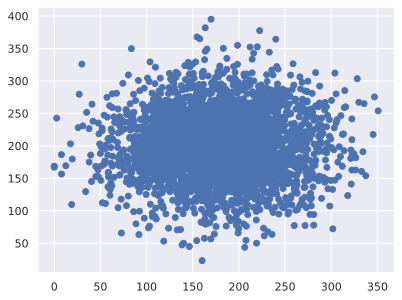

In [16]:
plt.scatter(df["Total day minutes"], df["Total night minutes"])

We get an uninteresting picture of two normally distrubuted variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.(If the plots seem to go from bottom left to top right they have a positive correlation and negative if the move in the other direction)

We can use seaborn to do the same

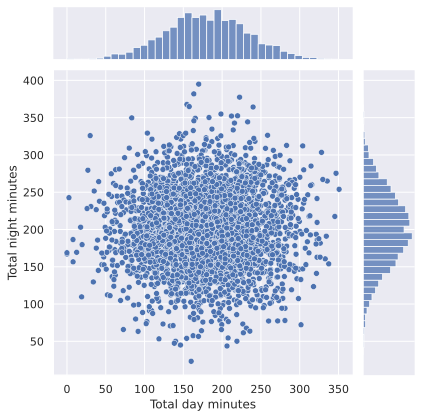

In [17]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter")

We can get a smoothed version of the distribution using the same function

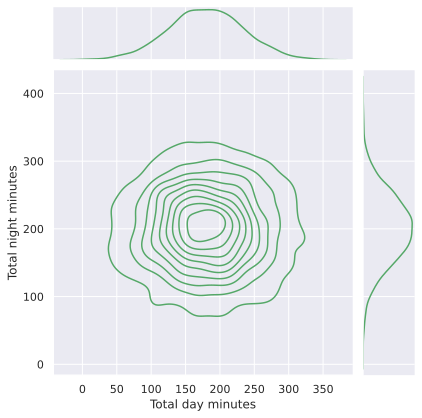

In [18]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="g")

This is basically a bivariate version of the Kernel Density Plot discussed earlier.

#Scatterplot matrix

In some cases, we may want to plot scatterplot matrix such as the one shown below. Its diagonal contains the distributions of the corresponding variables asn the scatter plots for each pair of variables fill the rest of the matrix.

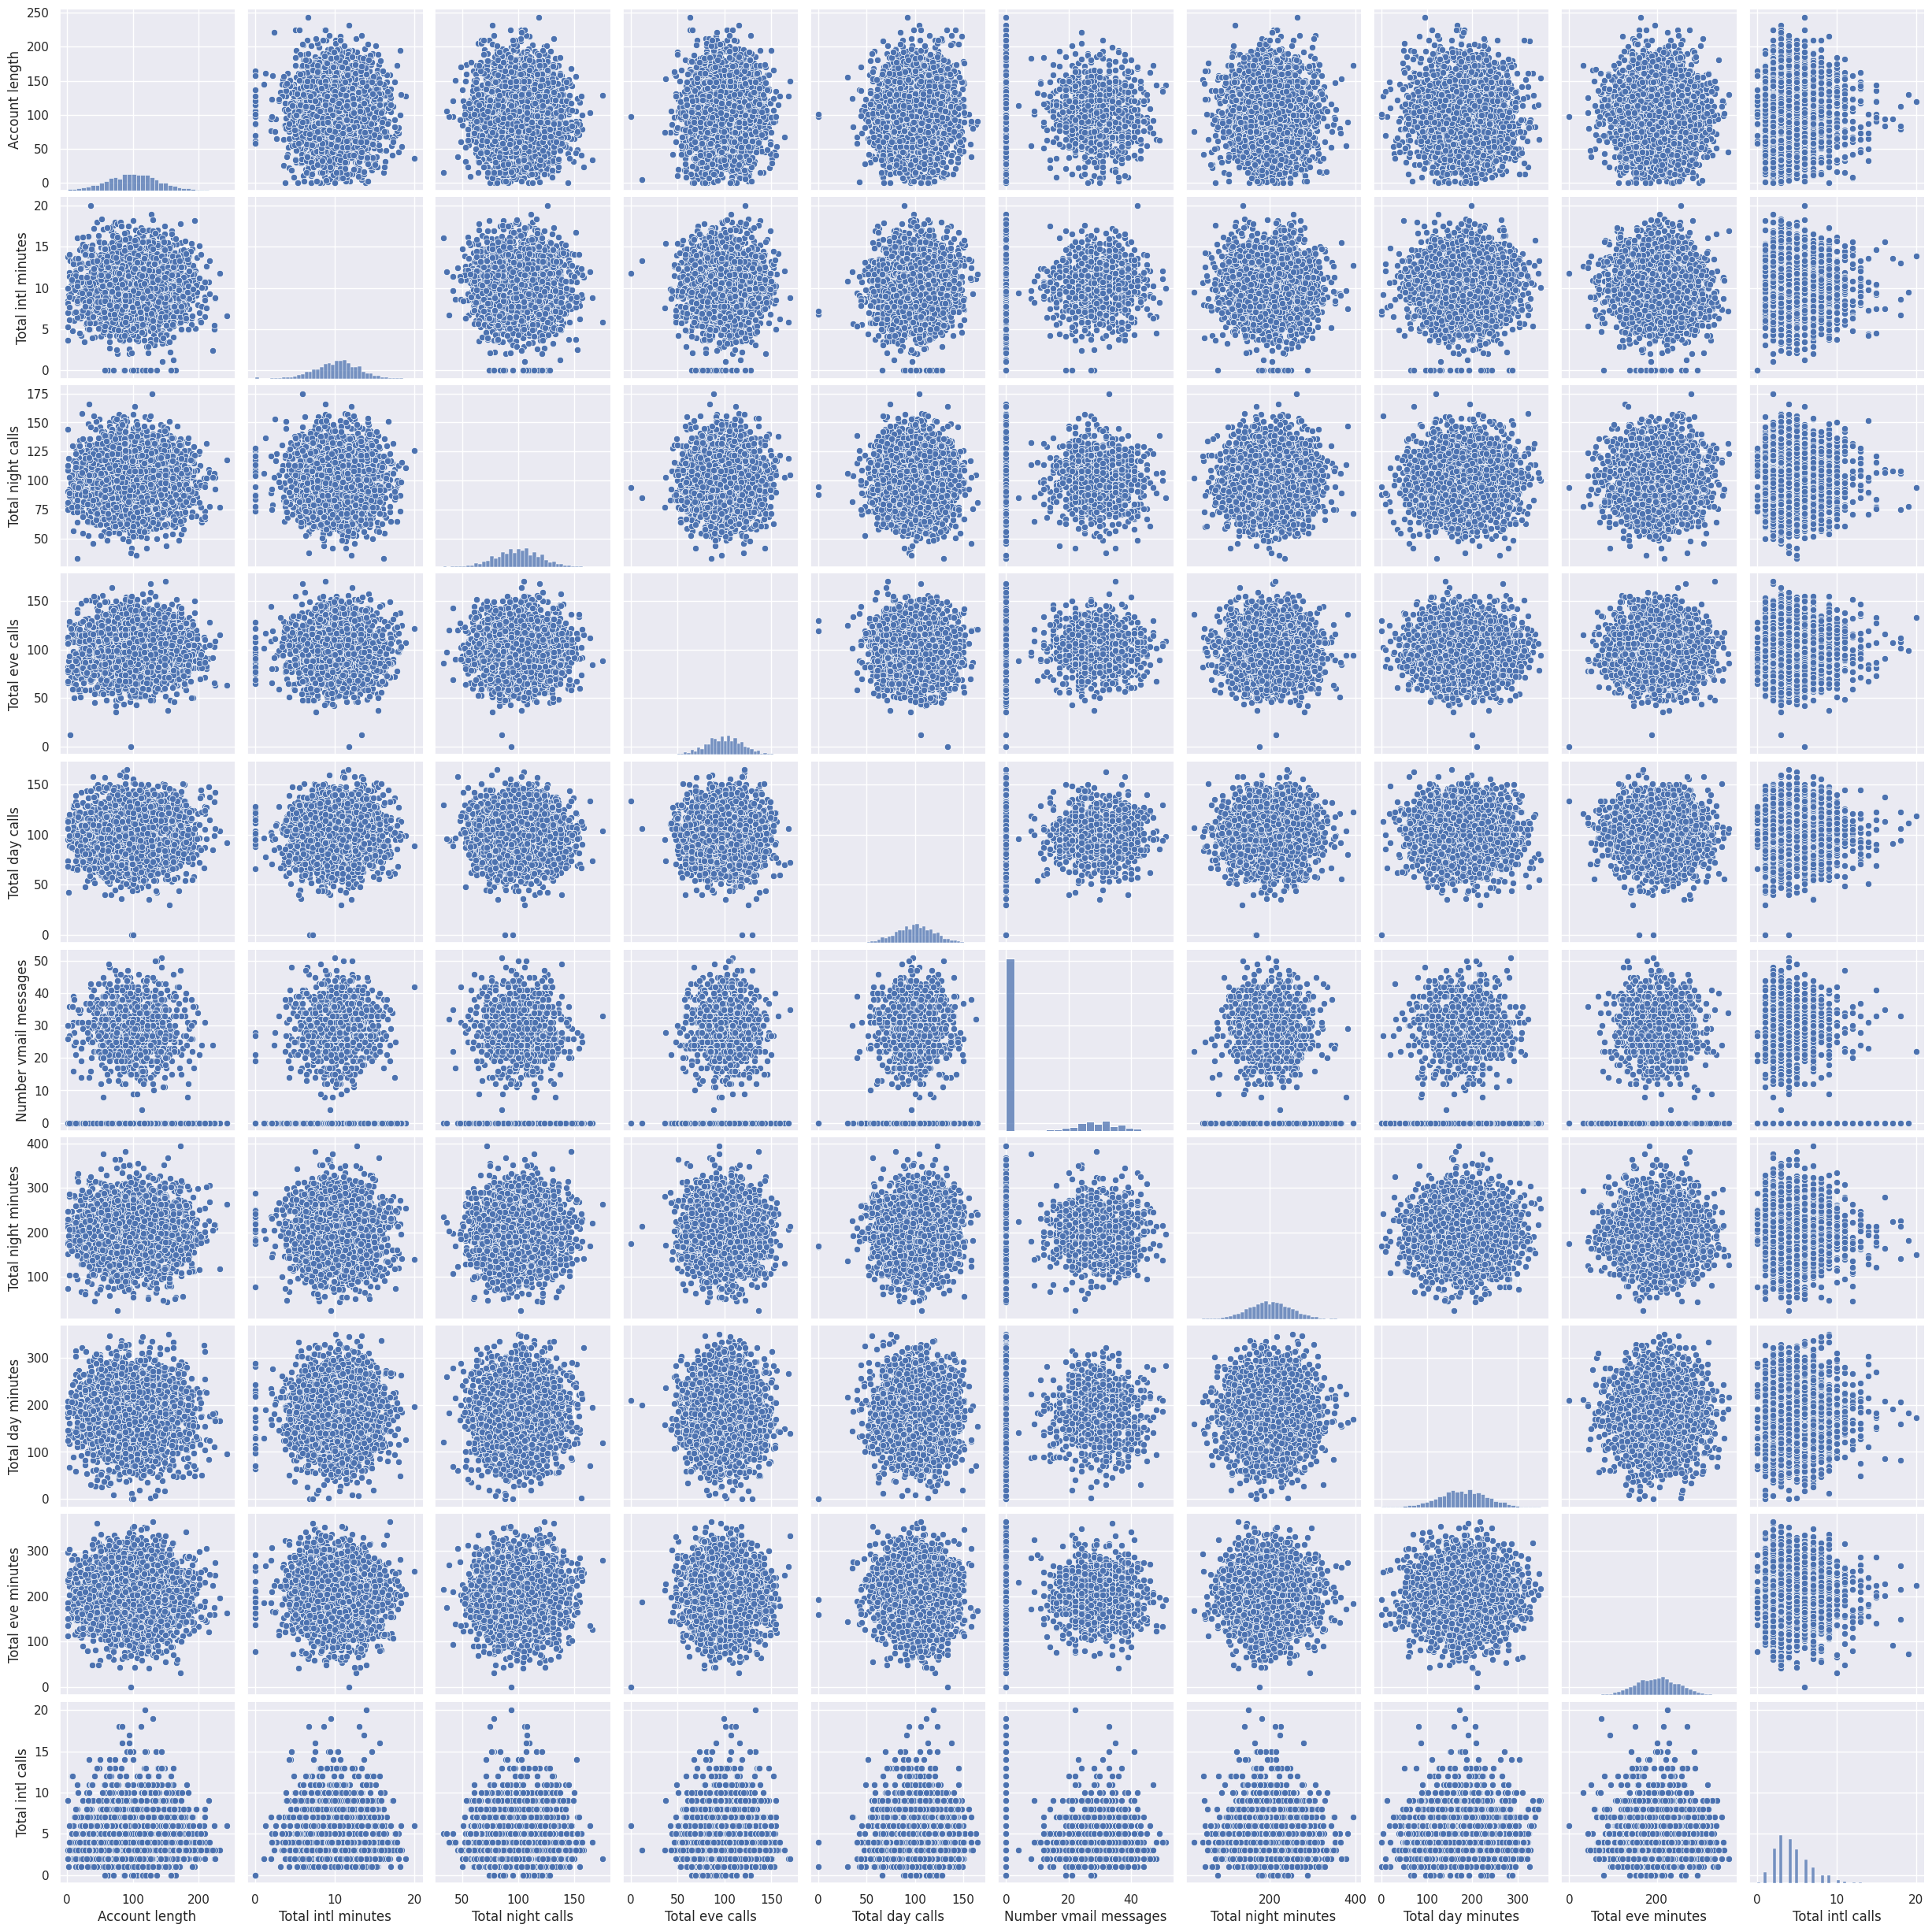

In [19]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

In [20]:
%config InlineBackend.figure_format = 'svg'

#Quantitative and Categorical
In this section, we will make the quantitative plots more exciting. We will gain new insights for churn prediction from the interaction between the numerical and categorical features.

Let's see how the input variables are related to the target variable churn.

We can color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the scatter() function, but we will try a new function called lmplot() and use the parameter hue to indicate our categorical feature of interest:

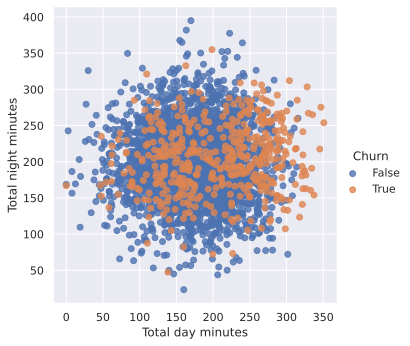

In [21]:
sns.lmplot(x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False)

A small proportion of disloyal customers lean towards the top right corner; that is, customers tend to spend more time on the phone during both day and night. But this isn't clear, and we won't make any definitive conclusions from this chart.

Now, let's create box plots to visualize the distribution statistics of the numerical variables in disjoint groups: the loyal customers(Churn=False) and those who left (Churn=True).

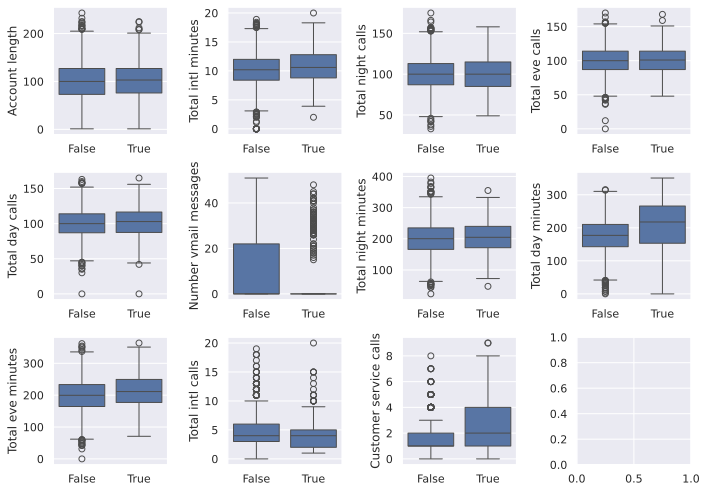

In [22]:
#Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
  ax = axes[int(idx / 4), idx % 4]
  sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
  ax.set_xlabel("")
  ax.set_ylabel(feat)
fig.tight_layout()

We can see that Total day minutes, customer service calls and Number vmail messages have the greatest discrepancy in distribution between the two gorups.

We can look at the distribution fo day minutes spoken for loyal and disloyal customers seperately. We will create box and violin plots for Total day minutes grouped by the target variable

<Axes: xlabel='Churn', ylabel='Total day minutes'>

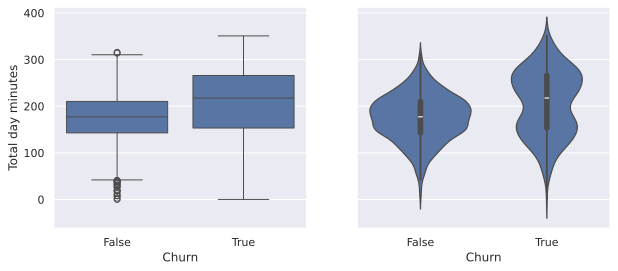

In [23]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(10,4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1])

In this case, the violin plot doesnt contribute any additional information about our data as everything is clear from the box plot alone, disloyal customers tend to talk on the phone more.

Its observed that on average, customers that discontinue their contracts are more active users of communication services. Perhaps, they are unhappy with the tariffs,so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.


We can analyze a quantitative variable in two categorical dimensions at once, there is a sutable function for this in the seaborn library called catplot(). For example we use it to visualize the interaction between Total day minutes and two categorical variables in the same plot

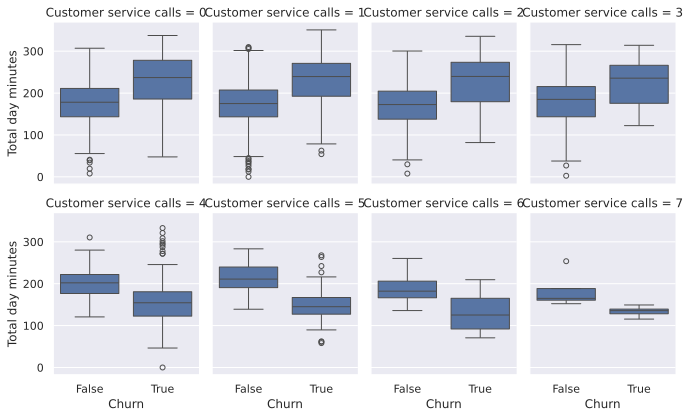

In [24]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col = "Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8
)

From this, we could conclude that starting with four calls, Total day minutes may no longer be the main factor for customer churn. Perhaps, in addition to out previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

#Categorical vs Categorical
As we saw earlier, the variable Customer service calls has few unique values and, thus, can be considered either numerical or ordinal. We have already seen its distribution with a count plot. Now, we are interested in the relationship between this ordinal feature and the target variable Churn.

Ler's look at the distribution of the number of calls to customer service, again using a count plot. This time, let's also pass the parameter hue=Churn that adds a categorical dimension to the plot:

<Axes: xlabel='Customer service calls', ylabel='count'>

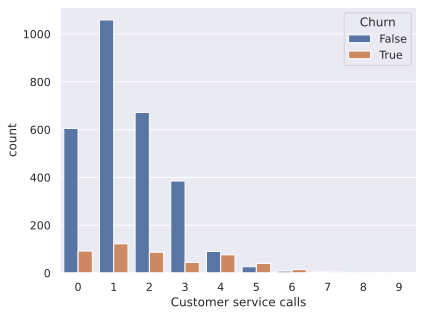

In [25]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)

We observe that the churn rate increases significantly after 4 or more calls to customer service.

Now, lets look that the relationship between Churn and the binary features, International plan and Voice mail plan.


<Axes: xlabel='Voice mail plan', ylabel='count'>

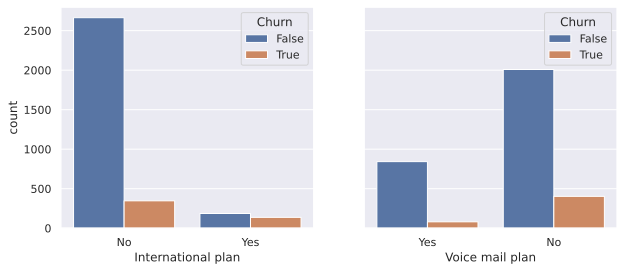

In [27]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(10,4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1])

When the international plan is enabled, the churn rate is much higher, the usage of the international plan by the customer is a strong feature. We do not observe the same effect with the voice mail plan(Dont make the mistake of looking at the churn quantity by itself, look at the percentage of disloyal customers as compared to the total customers for the plan(yes or no))

##Contingency table
A contingency table shows a multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how Churn is related to the categorical variable State by creating a cross tabulation:



In [28]:
pd.crosstab(df["State"], df["Churn"]).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In the State of the case wee see that distinct values is 51. We also see that there are only a few data points available to each individual state. 3 - 17 customers in each state abandoned the operator. Let's calculate the churn rate for each state, sorting it from high to low.

In [30]:
df.groupby(["State"])["Churn"].agg(["mean"]).sort_values(by="mean", ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

At first glance, it seems that the churn rate in New Jersey and California is above 25% and less that 6% for Hawaii and Alaska. However, these conclutions are based on two few examplesm and our observation could be a mere property of our particualar dataset.(Read of the Matthews and Cramer correlation hypothesis)

#Whole Dataset visualizations

##A naive approach

We have been looking at different facets of our dataset by guessing interesting features and selecting a small number of them at a time for visualization. We have only dealt with two or 3 variables at once and were easily able to observe the structure and relationships in the data. But what if we want to display all the features and still be able to interpret the resulting visualization.

We could use hist() or create a scatterplot matrix with pairplot() for the whole dataset to look at all our features simultaneously. But, when the number of features is high enough, this kind of visual analysis quickly becomes slow and ineffecient. Besides, we would still be analyzing our variables in a pairwise fashion not all at once.


##Dimensionality reduction
Most real-world datasets have many features, sometimes, many thousands of them. Each of them can be considered as a dimension in the space of data points. Consequently, more often than not, we deal with high-dimensional datasets, where entire visualization is quite hard.

To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about the data. This task is called dimensionality reduction and is an example of an unsupervised learning problem because we need to derive new, low-dimensional features from the data itself, without any supervised input.

One of the well-known dimensionality reduction methods is Principal Component Analysis (PCA), which we will study later in this course. Its limitation is that it is a linear algorithm that implies certain restrictions on the data.

There are also many non-linear methods, collectively called Manifold Learning. One of the best-known of them is t-SNE.

##t-SNE

We're going to create a t-SNE representation of the same churn data we have been using.

The name of the method looks complex and a bit intimidating: t-distributed Stochastic Neighbor Embedding. Its math is also impressive, but its basic idea is simple: Find a projection for a high-dimensional feature space onto a plane(or a 3D hyperplane, but it it almost always 2D) such that those points that were far apart in the initial n-dimensional space will end up far apart on the plane. Those that were originally close will remain close to each other.

Essentially, neighbor embedding is a search for a new and less dimensional data representation that preserves neighborship of examples.

Now, lets do some practice. First, we need to import some additional classes:

In [31]:
from sklearn.manifold import TSNE
from sklearn.preprocessing imp  ort StandardScaler

We will leave out the State and Churn features and convert the values "Yes"/"No" of the binary features into numerical values using pandas.Series.map()

In [34]:
X = df.drop(["Churn","State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes":1, "No":0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes":1, "No": 0})

We also need to normalize the data. For this, we will subtract the mean from each variable and divide it by its standard deviation. All of this can be done with StandardScaler

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now we build a t-SNE representation:


In [36]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 31.1 s, sys: 94.1 ms, total: 31.2 s
Wall time: 31.3 s


and plot it:

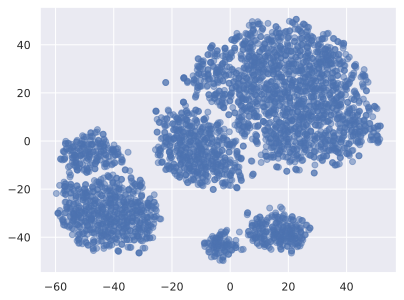

In [37]:
plt.scatter(tsne_repr[:,0], tsne_repr[:, 1], alpha=0.5)

We will color the t-SNE representation according to the churn(blue for loyal customers and orange for those who churned)

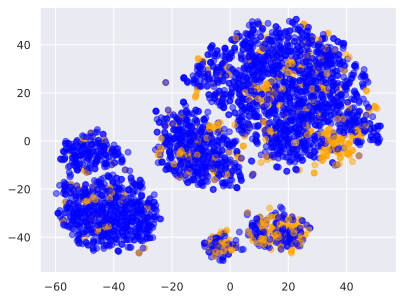

In [39]:
plt.scatter(tsne_repr[:,0],
            tsne_repr[:,1],
            c=df["Churn"].map({False:"blue", True:"orange"}),
            alpha=0.5)

We can see that customers who churned are concentrated in a few areas of the lower dimensional space feature.

To better understand the picture, we can also color it with the remaining binary features: International voice plan and Voicemail. Orange dots indicate instances that are positive for the corresponding binary feature:

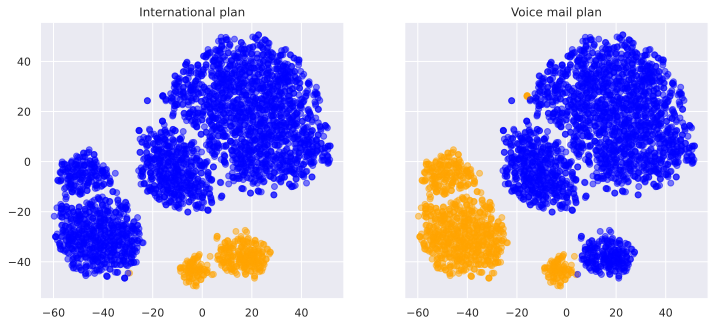

In [42]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(12,5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
  axes[i].scatter(
      tsne_repr[:,0],
      tsne_repr[:,1],
      c=df[name].map({"Yes":"orange", "No": "blue"}),
      alpha=0.5
  )
  axes[i].set_title(name)

Now it is clear that, for example, many dissatisfied customers who canceled their subscriptions are crowded together in one cluster, representing the people with the international plan but no voice mail.

Finally, let’s note some disadvantages of t-SNE:

  High computational complexity. The implementation in scikit-learn is unlikely to be feasible in a real task. If you have a large number of samples, you should try Multicore-TSNE instead.

  The plot can change a great deal depending on the random seed, which complicates interpretation. Here is a good tutorial on t-SNE. In general, you shouldn’t make any far-reaching conclusions based on such graphs because it can equate to plain guessing. Of course, some findings in t-SNE pictures can inspire an idea and be confirmed through more thorough research down the line, but that does not happen very often.

Occasionally, using t-SNE, you can get a really good intuition for the data. The following is a good paper that shows an example of this for handwritten digits: Visualizing MNIST.